# Predicting Bankruptcy using Deep Learning

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
pwd

'C:\\Users\\Nikhil\\Desktop\\SPJ-Financial Analytics'

In [ ]:
import os
os.chdir('/content/drive/My Drive')

In [8]:
df = pd.read_csv('Balanced_dataset_asof0817/Balanced_dataset_asof0817')

In [9]:
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,48,49,50,51,52,53,54,55,56,label
0,0,0.007208,-0.007865,0.007028,-0.175039,0.028868,0.038711,0.032867,0.033783,0.024988,...,-0.016935,-0.004814,-0.013940,-0.020445,-0.024377,-0.082360,-0.037266,-0.044682,-0.379891,0
1,1,0.007208,-0.012523,0.007028,-0.150387,0.046052,0.038885,0.033454,0.034460,0.031195,...,0.521458,-0.032052,-0.013547,-0.019600,-0.024377,0.099773,-0.037266,0.037082,0.113446,0
2,2,0.007208,-0.012561,0.007028,-0.181403,-0.148071,0.038827,0.032841,0.034234,0.024823,...,-0.016130,-0.005928,-0.009726,-0.030213,-0.024310,-0.079108,-0.037266,-0.162260,1.654544,0
3,3,0.007208,-0.007925,0.007028,-0.182106,-0.088925,0.036465,0.030983,0.032366,0.025871,...,-0.012172,-0.031993,0.004242,0.054409,-0.024377,0.125792,-0.037266,0.265480,-0.443563,0
4,4,0.007208,-0.010104,0.007028,-0.158995,0.416657,0.038868,0.032841,0.034165,0.024293,...,-0.015725,-0.019109,-0.016223,-0.045763,-0.024377,-0.082360,-0.037266,-0.077117,-0.290066,0


In [10]:
df.reset_index(drop = True)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,48,49,50,51,52,53,54,55,56,label
0,0,0.007208,-0.007865,0.007028,-0.175039,0.028868,0.038711,0.032867,0.033783,0.024988,...,-0.016935,-0.004814,-0.013940,-0.020445,-0.024377,-0.082360,-0.037266,-0.044682,-0.379891,0
1,1,0.007208,-0.012523,0.007028,-0.150387,0.046052,0.038885,0.033454,0.034460,0.031195,...,0.521458,-0.032052,-0.013547,-0.019600,-0.024377,0.099773,-0.037266,0.037082,0.113446,0
2,2,0.007208,-0.012561,0.007028,-0.181403,-0.148071,0.038827,0.032841,0.034234,0.024823,...,-0.016130,-0.005928,-0.009726,-0.030213,-0.024310,-0.079108,-0.037266,-0.162260,1.654544,0
3,3,0.007208,-0.007925,0.007028,-0.182106,-0.088925,0.036465,0.030983,0.032366,0.025871,...,-0.012172,-0.031993,0.004242,0.054409,-0.024377,0.125792,-0.037266,0.265480,-0.443563,0
4,4,0.007208,-0.010104,0.007028,-0.158995,0.416657,0.038868,0.032841,0.034165,0.024293,...,-0.015725,-0.019109,-0.016223,-0.045763,-0.024377,-0.082360,-0.037266,-0.077117,-0.290066,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39956,39956,0.007208,0.006839,0.007028,-0.182851,-0.131705,0.036661,0.032207,0.032183,0.023019,...,-0.017033,-0.027783,-0.006135,0.191123,-0.024329,-0.048303,-0.011602,-0.019291,-0.329352,1
39957,39957,0.007208,0.003076,0.007028,-0.182895,-0.119716,0.036983,0.032300,0.032569,0.023719,...,-0.017217,-0.029197,-0.003584,0.531933,-0.024243,-0.043931,-0.021744,-0.034785,-0.205704,1
39958,39958,0.007208,0.003660,0.007028,-0.048103,0.176397,0.020637,0.015031,0.014398,0.005987,...,-0.017820,0.123967,-0.026220,-0.063531,-0.024377,-0.082360,-0.037266,-0.036509,-0.360805,1
39959,39959,0.007208,-0.008278,0.007028,-0.166330,-0.038964,0.038833,0.030590,0.031627,0.025897,...,-0.018941,-0.020796,-0.019736,-0.050688,-0.024377,-0.060096,0.019104,-0.216671,-0.431634,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39961 entries, 0 to 39960
Data columns (total 59 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  39961 non-null  int64  
 1   0           39961 non-null  float64
 2   1           39961 non-null  float64
 3   2           39961 non-null  float64
 4   3           39961 non-null  float64
 5   4           39961 non-null  float64
 6   5           39961 non-null  float64
 7   6           39961 non-null  float64
 8   7           39961 non-null  float64
 9   8           39961 non-null  float64
 10  9           39961 non-null  float64
 11  10          39961 non-null  float64
 12  11          39961 non-null  float64
 13  12          39961 non-null  float64
 14  13          39961 non-null  float64
 15  14          39961 non-null  float64
 16  15          39961 non-null  float64
 17  16          39961 non-null  float64
 18  17          39961 non-null  float64
 19  18          39961 non-nul

In [11]:
dataset = df.drop(columns = 'Unnamed: 0')

In [12]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,label
0,0.007208,-0.007865,0.007028,-0.175039,0.028868,0.038711,0.032867,0.033783,0.024988,0.038540,...,-0.016935,-0.004814,-0.013940,-0.020445,-0.024377,-0.082360,-0.037266,-0.044682,-0.379891,0
1,0.007208,-0.012523,0.007028,-0.150387,0.046052,0.038885,0.033454,0.034460,0.031195,0.038811,...,0.521458,-0.032052,-0.013547,-0.019600,-0.024377,0.099773,-0.037266,0.037082,0.113446,0
2,0.007208,-0.012561,0.007028,-0.181403,-0.148071,0.038827,0.032841,0.034234,0.024823,0.038647,...,-0.016130,-0.005928,-0.009726,-0.030213,-0.024310,-0.079108,-0.037266,-0.162260,1.654544,0
3,0.007208,-0.007925,0.007028,-0.182106,-0.088925,0.036465,0.030983,0.032366,0.025871,0.035610,...,-0.012172,-0.031993,0.004242,0.054409,-0.024377,0.125792,-0.037266,0.265480,-0.443563,0
4,0.007208,-0.010104,0.007028,-0.158995,0.416657,0.038868,0.032841,0.034165,0.024293,0.038540,...,-0.015725,-0.019109,-0.016223,-0.045763,-0.024377,-0.082360,-0.037266,-0.077117,-0.290066,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39961 entries, 0 to 39960
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       39961 non-null  float64
 1   1       39961 non-null  float64
 2   2       39961 non-null  float64
 3   3       39961 non-null  float64
 4   4       39961 non-null  float64
 5   5       39961 non-null  float64
 6   6       39961 non-null  float64
 7   7       39961 non-null  float64
 8   8       39961 non-null  float64
 9   9       39961 non-null  float64
 10  10      39961 non-null  float64
 11  11      39961 non-null  float64
 12  12      39961 non-null  float64
 13  13      39961 non-null  float64
 14  14      39961 non-null  float64
 15  15      39961 non-null  float64
 16  16      39961 non-null  float64
 17  17      39961 non-null  float64
 18  18      39961 non-null  float64
 19  19      39961 non-null  float64
 20  20      39961 non-null  float64
 21  21      39961 non-null  float64
 22

In [ ]:
dataset.corr().label

0       -0.010975
1       -0.002331
2       -0.016250
3       -0.079094
4       -0.083763
5       -0.002659
6        0.004689
7        0.005516
8        0.015100
9       -0.002571
10      -0.007000
11      -0.110200
12       0.010072
13      -0.012025
14      -0.003768
15      -0.005879
16       0.005982
17      -0.017751
18      -0.052064
19      -0.000421
20      -0.029528
21       0.053573
22       0.035893
23       0.014874
24       0.003721
25       0.028213
26       0.196544
27       0.010362
28       0.162603
29      -0.016250
30       0.189781
31       0.121446
32      -0.025905
33      -0.033837
34      -0.015229
35       0.006013
36      -0.006734
37       0.021033
38       0.092276
39       0.016145
40       0.015080
41       0.000702
42      -0.006581
43       0.025866
44       0.024859
45       0.024392
46      -0.026744
47       0.118433
48      -0.007796
49      -0.016156
50       0.006208
51       0.037731
52      -0.014423
53      -0.002220
54       0.004940
55       0

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [28]:
from keras.layers import Dense,Dropout
from keras.models import Sequential

In [29]:
from keras.utils.vis_utils import plot_model

In [30]:
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [32]:
def scheduler(epochs, lr):
    return lr * tf.math.exp(-0.01)

lrs = LearningRateScheduler(scheduler)
es = EarlyStopping(monitor = 'val_accuracy', patience = 100)
#rlp = ReduceLROnPlateau(monitor='val_accuracy', patience=2, factor=0.2)

checkpoint_path = "/content/drive/My Drive/Financial Analytics/wts/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
checkpoint = ModelCheckpoint(filepath = checkpoint_path,
                             save_best_only = True,
                             save_weights_only = False,
                             verbose = 1,
                             monitor = 'val_accuracy')
#checkpoint = ModelCheckpoint('/content/drive/My Drive/Financial Analytics/Weights/finacial_model_{epoch:03d}.ckpt',
 #                            save_best_only=True,
  #                           save_weights_only=True,
   #                          monitor='val_accuracy')

In [24]:
X = dataset.drop('label', axis = 1)

In [25]:
X

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.007208,-0.007865,0.007028,-0.175039,0.028868,0.038711,0.032867,0.033783,0.024988,0.038540,...,0.780566,-0.016935,-0.004814,-0.013940,-0.020445,-0.024377,-0.082360,-0.037266,-0.044682,-0.379891
1,0.007208,-0.012523,0.007028,-0.150387,0.046052,0.038885,0.033454,0.034460,0.031195,0.038811,...,0.505685,0.521458,-0.032052,-0.013547,-0.019600,-0.024377,0.099773,-0.037266,0.037082,0.113446
2,0.007208,-0.012561,0.007028,-0.181403,-0.148071,0.038827,0.032841,0.034234,0.024823,0.038647,...,0.918007,-0.016130,-0.005928,-0.009726,-0.030213,-0.024310,-0.079108,-0.037266,-0.162260,1.654544
3,0.007208,-0.007925,0.007028,-0.182106,-0.088925,0.036465,0.030983,0.032366,0.025871,0.035610,...,0.708229,-0.012172,-0.031993,0.004242,0.054409,-0.024377,0.125792,-0.037266,0.265480,-0.443563
4,0.007208,-0.010104,0.007028,-0.158995,0.416657,0.038868,0.032841,0.034165,0.024293,0.038540,...,0.335175,-0.015725,-0.019109,-0.016223,-0.045763,-0.024377,-0.082360,-0.037266,-0.077117,-0.290066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39956,0.007208,0.006839,0.007028,-0.182851,-0.131705,0.036661,0.032207,0.032183,0.023019,0.036326,...,0.382449,-0.017033,-0.027783,-0.006135,0.191123,-0.024329,-0.048303,-0.011602,-0.019291,-0.329352
39957,0.007208,0.003076,0.007028,-0.182895,-0.119716,0.036983,0.032300,0.032569,0.023719,0.036645,...,0.290321,-0.017217,-0.029197,-0.003584,0.531933,-0.024243,-0.043931,-0.021744,-0.034785,-0.205704
39958,0.007208,0.003660,0.007028,-0.048103,0.176397,0.020637,0.015031,0.014398,0.005987,0.019130,...,-0.987910,-0.017820,0.123967,-0.026220,-0.063531,-0.024377,-0.082360,-0.037266,-0.036509,-0.360805
39959,0.007208,-0.008278,0.007028,-0.166330,-0.038964,0.038833,0.030590,0.031627,0.025897,0.039591,...,-0.592190,-0.018941,-0.020796,-0.019736,-0.050688,-0.024377,-0.060096,0.019104,-0.216671,-0.431634


In [26]:
y = dataset[['label']]

In [33]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 57)                3306      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               29696     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 296,171
Trainable params: 296,171
Non-trainable params: 0
__________________________________________________

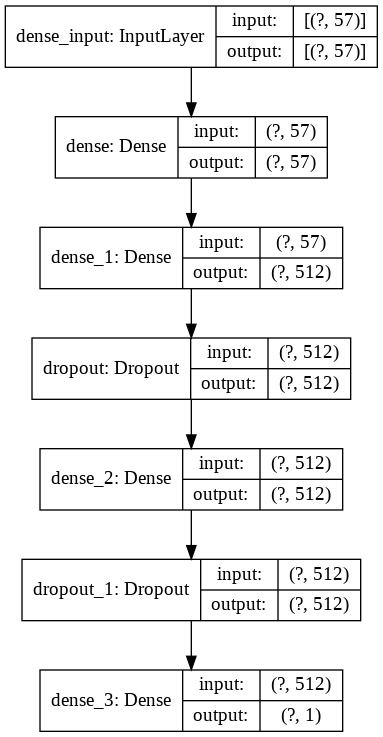

In [ ]:
model = Sequential()
model.add(Dense(57, input_dim = 57, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
print(model.summary())
plot_model(model, to_file = 'model flow.png', show_shapes = True, show_layer_names = True)

In [ ]:
# compile the keras model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#history = model.fit(X,y,epochs=100,batch_size=32) -> 99.45
history = model.fit(X_train , y_train, validation_split = 0.1 , validation_data = (X_test, y_test), epochs = 1000, batch_size = 100, callbacks = [lrs, checkpoint])
#validation_data=(X_test,y_test)
#,callbacks=[lrs]

Epoch 1/1000
270/270 [==============================] - 1s 3ms/step - loss: 0.0984 - accuracy: 0.9718 - val_loss: 0.3956 - val_accuracy: 0.9353
Epoch 2/1000
270/270 [==============================] - 1s 3ms/step - loss: 0.0909 - accuracy: 0.9693 - val_loss: 0.3639 - val_accuracy: 0.9299
Epoch 3/1000
270/270 [==============================] - 1s 2ms/step - loss: 0.0809 - accuracy: 0.9717 - val_loss: 0.3775 - val_accuracy: 0.9339
Epoch 4/1000
270/270 [==============================] - 1s 2ms/step - loss: 0.0855 - accuracy: 0.9721 - val_loss: 0.2992 - val_accuracy: 0.9409
Epoch 5/1000
270/270 [==============================] - 1s 2ms/step - loss: 0.0699 - accuracy: 0.9756 - val_loss: 0.3213 - val_accuracy: 0.9436
Epoch 6/1000
270/270 [==============================] - 1s 3ms/step - loss: 0.0743 - accuracy: 0.9725 - val_loss: 0.3159 - val_accuracy: 0.9356
Epoch 7/1000
270/270 [==============================] - 1s 2ms/step - loss: 0.0873 - accuracy: 0.9707 - val_loss: 0.2801 - val_accuracy:

In [ ]:
# evaluate the keras model
i, accuracy = model.evaluate(X_test, y_test,verbose = 0)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 91.46


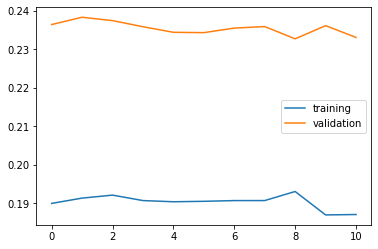

In [ ]:
plt.plot(history.history['loss'], label = "training")
#plt.plot(hist.history['loss'])
#plt.show()

plt.plot(history.history['val_loss'], label = 'validation')
#plt.plot(hist.history['loss'])
plt.legend()
plt.show()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               7424      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 258       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 24,197
Trainable params: 24,197
Non-trainable params: 0
_________________________________________________________________
None


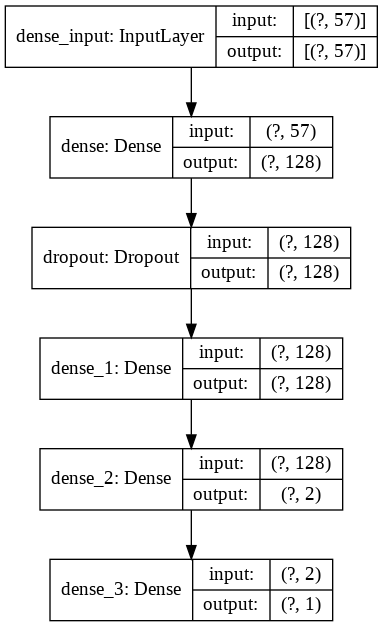

In [ ]:
from tensorflow.keras import backend as K
K.clear_session()
model = Sequential()
model.add(Dense(128, input_dim = 57, activation = 'relu'))
model.add(Dropout(0.15))
model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dense(2, activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
print(model.summary())
plot_model(model, to_file = 'model flow.png', show_shapes = True, show_layer_names = True)

In [ ]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#history = model.fit(X,y,epochs=100,batch_size=32) -> 99.45
history = model.fit(X_train, y_train, validation_split = 0.1, validation_data = (X_test, y_test), epochs = 150, batch_size = 32, callbacks = [lrs, checkpoint])
#validation_data=(X_test,y_test)
#,callbacks=[lrs]

Epoch 1/150
946/956 [============================>.] - ETA: 0s - loss: 0.5929 - accuracy: 0.7303
Epoch 00001: val_accuracy improved from -inf to 0.77304, saving model to /content/drive/My Drive/Financial Analytics/wts/cp.ckpt
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Financial Analytics/wts/cp.ckpt/assets
956/956 [==============================] - 3s 3ms/step - loss: 0.5923 - accuracy: 0.7309 - val_loss: 0.5364 - val_accuracy: 0.7730
Epoch 2/150
941/956 [============================>.] - ETA: 0s - loss: 0.4967 - accuracy: 0.7920
Epoch 00002: val_accuracy improved from 0.77304 to 0.79659, saving model to /content/drive/My Drive/Financial Analytics/wts/cp.ckpt
INFO:tensorflow:Assets written to: /content/drive/My Drive/Financial Analytics/wts

In [ ]:
i, accuracy = model.evaluate(X_test, y_test, verbose = 0)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 95.70


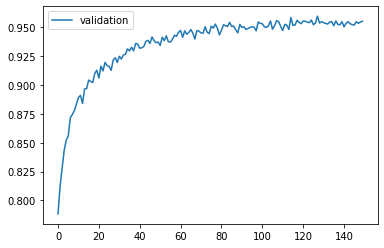

In [ ]:
plt.plot(history.history['val_accuracy'], label = 'validation')
#plt.plot(hist.history['loss'])
plt.legend()
plt.show()

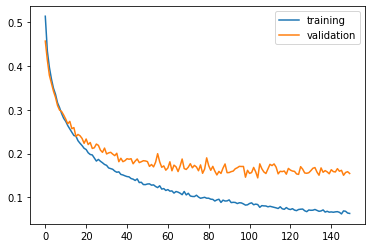

In [ ]:
plt.plot(history.history['loss'], label = "training")
#plt.plot(hist.history['loss'])
#plt.show()

plt.plot(history.history['val_loss'], label = 'validation')
#plt.plot(hist.history['loss'])
plt.legend()
plt.show()